In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
# shortcut commets cntr-k + cntr-c and uncomment cntr-k + cntru

LOADING CSV and MYSQL


In [12]:
df=pd.read_csv("D:\OneDrive - AVASA\BYU-I\In-learning\python pandas analytics\Rev2022.csv")
dfrev=pd.DataFrame(df)
list(dfrev.columns)
#dfrev.head(10)

['BRAND',
 'status',
 'dbr_date_out',
 'dbr_date',
 'loc_out',
 'LOCACION_in',
 'empl_out',
 'gate_agent',
 'number',
 'Prep_Fuel',
 'res_no',
 'rulefl_prod',
 'source_code',
 'CLOSE_MISC',
 'veh_class',
 'veh_class.1',
 'ECONOMICO',
 'MODEL',
 'cdpid',
 'CORP_Name',
 'RA_Points',
 'Odom_in',
 'Odom_out',
 'Last_Name',
 'rent_days',
 'dbr_days',
 'bun_time_chg',
 'unbun_time_chg',
 'ret_inc_chg',
 'vch_inc_chg',
 'mile_chg',
 'disc_chg',
 'csadj_chg',
 'promo_chg',
 'estimate',
 'age24_chg',
 'baby_chg',
 'movpk_chg',
 'cccp_chg',
 'cvg2_chg',
 'cvg3_chg',
 'cvg4_chg',
 'cvg5_chg',
 'cvg6_chg',
 'delco_chg',
 'drivr_chg',
 'fpfee_chg',
 'drop_chg',
 'fuel_chg',
 'ppd_fuel_chg',
 'ldwba_chg',
 'ldwpl_chg',
 'ldwpr_chg',
 'ldwc1_chg',
 'ldwc9_chg',
 'cvg7_chg',
 'cotg_chg',
 'icem_chg',
 'icem2_chg',
 'safe_chg',
 'prert_chg',
 'presr_chg',
 'gopro_chg',
 'tag_chg',
 'scand_chg',
 'hsp_chg',
 'tvlpk_chg',
 'self_chg',
 'ldw0_chg',
 'ldw1_chg',
 'ldw10_chg',
 'ldw11_chg',
 'ldw12_chg',
 '

In [75]:
import mysql.connector as mysql

HOST = "mysql3001.mochahost.com"
DATABASE = "brbr77_avasanet"
USER = "brbr77_auditor"
PASSWORD = "BrainPowder"

db_connection = mysql.connect(host=HOST, 
                              database=DATABASE, 
                              user=USER, 
                              password=PASSWORD)

print("Connected to:", db_connection.get_server_info())

Connected to: 5.6.33


In [77]:
data_veh=pd.read_sql("SELECT * FROM vehiculos",db_connection)
list(data_veh.columns)
#data_veh.describe()
data_veh.head(10)

,id,Veh_number,Curr_odom,status_id,Notes,Year,Model,Color,Vin,Purch_date,...,locaciones_id,tank_size,tank2_size,class,sales_date,sales_price,turnback_check,make,options,type
0,1,KE0028,16,16,MEGA OAXACA SA DE CV,20.0,SEDONA,PLATA LJ,KNDMB5C25L6602934,2019-10-14,...,802,80.0,0.0,R,2021-08-12,395000.0,B,KIA,SEDONA LX,LX AUT
1,2,KE0029,16,16,FRANCOMOTORS AUTOMOTRIZ SA DE,20.0,SEDONA,AZUL LJ,KNDMB5C28L6602958,2019-10-14,...,214,80.0,0.0,R,2021-10-19,399000.0,B,KIA,SEDONA LX,LX AUT
2,3,KE0030,16,16,ABUSO DE CONFIANZA,20.0,SEDONA,BLANC EN,KNDMB5C28L6602698,2019-10-14,...,603,80.0,0.0,R,2022-12-27,331200.0,.,KIA,LX,SEDONA
3,4,KE0031,12,12,,20.0,SEDONA,PLATA EN,KNDMB5C24L6584104,2019-10-14,...,181,80.0,0.0,R,None,0.0,.,KIA,LX,SEDONA
4,5,KE0032,16,16,JUAN LUIS RODRIGUEZ VARGAS,20.0,SEDONA,BLANC LJ,KNDMB5C20L6602694,2019-10-14,...,1489,80.0,0.0,R,2021-11-19,439900.0,B,KIA,SEDONA LX,LX AUT
5,6,KE0033,16,16,ANGAR AZCAPOTZALCO SA DE CV,20.0,SEDONA,BLANC LJ,KNDMB5C27L6602420,2019-10-14,...,259,80.0,0.0,R,2021-05-18,392000.0,,KIA,SEDONA LX,LX AUT
6,7,KE0034,16,16,AUTOMOTRIZ BONN SA DE CV,20.0,SEDONA,BLANC LJ,KNDMB5C24L6602696,2019-10-14,...,328,80.0,0.0,R,2021-09-14,395000.0,B,KIA,SEDONA LX,LX AUT
7,8,CA0352,16,16,CENTAURO AUTOMOTRIZ,20.0,CAVALILT,TERRA LJ,LSGKB54H6LV041065,2020-02-20,...,46,46.0,0.0,F,2021-07-10,215000.0,B,CHE,CAVALIER L,LT AUT
8,10,KF0325,16,16,ROSA ELIA RAMIREZ NU=D1EZ,20.0,FORTELX,BLANCO,3KPF24AD6LE193831,2019-12-16,...,1489,50.0,0.0,G,2022-10-06,260000.0,,KIA,LX,FORTE
9,11,VV0B09,16,16,AUTOS SS DE SAN LUIS POTOSI SA,20.0,VENTO,PLATA LJ,MEX512606LT047890,2019-12-06,...,214,55.0,0.0,D,2021-08-03,171000.0,B,VW,STARTLINE,STARTLIN


In [49]:
dfveh=pd.DataFrame(data_veh,columns=["Veh_number","Year","status_id","make"])
#dfveh.groupby("make").sum() # group by to check
dfveh.where(dfveh["status_id"]>1)

,Veh_number,Year,status_id,make
0,KE0028,20.0,16.0,KIA
1,KE0029,20.0,16.0,KIA
2,KE0030,20.0,16.0,KIA
3,KE0031,20.0,12.0,KIA
4,KE0032,20.0,16.0,KIA
...,...,...,...,...
56756,VA3129,23.0,12.0,CHE
56757,VA3130,23.0,12.0,CHE
56758,356747,90.0,3.0,CADILLAC
56759,843749,90.0,12.0,CHEVROLE


practice mathlib

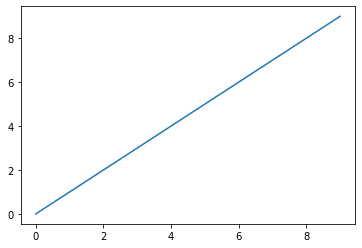

In [57]:
%matplotlib inline
datap = np.arange(10)
datap
plt.plot(datap)

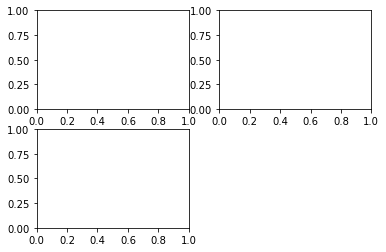

In [97]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

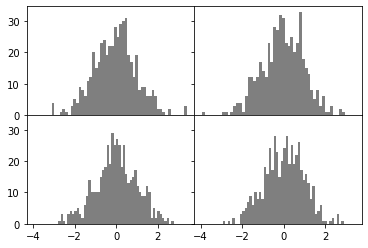

In [60]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
#! figure,id=mpl_subplots_adjust,width=4in,title="Data visualization with no inter-subplot spacing"
fig.subplots_adjust(wspace=0, hspace=0)

In [111]:
plt.close("all")


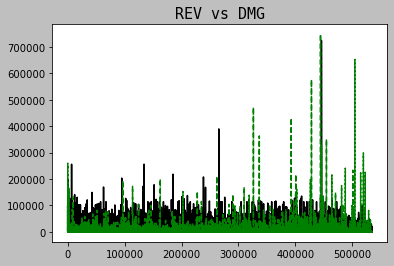

In [52]:
fig = plt.figure()
ax = fig.add_subplot()
data = pd.DataFrame(dfrev,columns=["rpt_as_rev"])
data1 = pd.DataFrame(dfrev,columns=["dmg_chg"])

ax.plot(data, color="black", linestyle="solid",drawstyle="steps-post", label="rev"); #solid line
ax.plot(data1, color="green", linestyle="dashed",drawstyle="steps-post", label="dmg"); #solid line
#ax.legend()
ax.set_title("REV vs DMG", family="monospace",fontsize=15)
plt.style.use('grayscale')
ax.set_xlabel="RPT"
ax.set_ylabel="dmg"

In [51]:
plt.close("all")

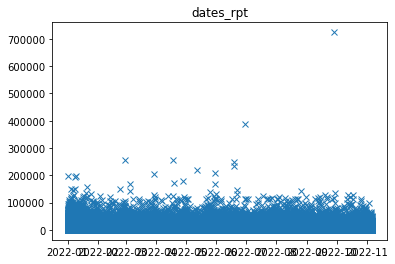

In [84]:
fig = plt.figure()
ax = fig.add_subplot()
dfy=pd.DataFrame(dfrev,columns=["rpt_as_rev"])
dfx=pd.DataFrame(dfrev,columns=["dbr_date"])
dfx
dfx1=pd.to_datetime(dfx["dbr_date"])
ax.plot(dfx1, dfy,"x")
ax.set_title("dates_rpt")
ax.set_ylabel="rpt"

<AxesSubplot:>

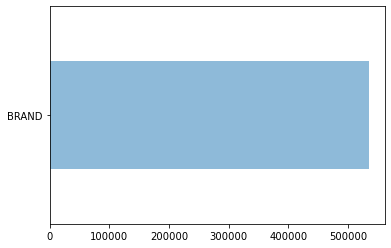

In [8]:
dfy1=pd.DataFrame(dfrev,columns=["BRAND"]).count()
#dfy1.plot.bar()
dfy1.plot.barh(stacked=True, alpha=0.5)

GROUPING

In [24]:
dfrev
grouped=dfrev.groupby(df["ECONOMICO"])
grouped.sum()

,CLOSE_MISC,RA_Points,Odom_in,Odom_out,rent_days,dbr_days,bun_time_chg,unbun_time_chg,ret_inc_chg,vch_inc_chg,...,alf_fee_chg,ff_fee_chg,dmg_chg,schr_chg,vlf_chg,iva_chg,rpt_as_rev,other_chg,EST_TOTAL,GROSS_REVENUE
ECONOMICO,,,,,,,,,,,,,,,,,,,,,
A41001,0.0,0,513102,503832,216.15,221.56,272829.92,180188.19,92641.73,597.49,...,15368.09,14346.08,5500.00,1505.30,14274.84,32558.58,334091.09,16096.96,391982.42,408189.10
A41002,5500.0,0,638360,619627,181.72,188.66,276666.97,190099.17,86567.80,726.94,...,23323.39,17853.00,30823.92,1259.88,14779.55,39156.43,350444.78,16017.69,406537.65,460619.49
A41003,0.0,0,557336,543969,196.53,202.32,224539.36,182449.88,42089.48,3494.80,...,29697.62,15353.37,4500.00,2223.10,14926.29,45329.51,339711.58,5456.30,386322.82,414143.35
A41004,0.0,0,487746,465163,213.52,219.33,382595.12,234541.00,148054.12,0.00,...,15381.62,17057.27,10775.86,1081.23,18270.63,33367.38,410102.92,20598.15,479941.59,506684.17
A41005,0.0,0,112857,107012,83.14,84.95,117485.21,87303.20,30182.01,0.00,...,10407.60,9391.81,37122.58,836.58,6570.25,23943.20,157083.56,10116.85,219023.82,231397.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZE2045,0.0,0,197009,182667,121.23,128.82,186968.78,98811.85,88156.93,5042.58,...,11516.76,3479.48,0.00,373.28,9999.18,13393.93,209007.01,69.58,242746.36,253490.43
ZE2046,0.0,0,195051,177686,134.71,140.48,197258.42,120521.24,76737.18,5118.72,...,15163.55,4056.39,0.00,735.68,10026.92,20405.66,214771.77,1620.00,253015.34,260117.45
ZE2047,0.0,0,474104,440345,127.75,131.80,258453.78,152763.48,105690.30,0.00,...,19384.66,8958.89,0.00,614.06,14210.07,22667.29,299281.51,900.00,364901.83,362216.77


In [27]:
grouped=dfrev["rpt_as_rev"].groupby(dfrev["ECONOMICO"])
grouped.sum()# group rpt by the column economico

ECONOMICO
A41001    334091.09
A41002    350444.78
A41003    339711.58
A41004    410102.92
A41005    157083.56
            ...    
ZE2045    209007.01
ZE2046    214771.77
ZE2047    299281.51
ZE2048    256061.85
ZE9003     12014.35
Name: rpt_as_rev, Length: 14419, dtype: float64

In [68]:
grouped=dfrev["rpt_as_rev"].groupby([dfrev["BRAND"],dfrev["MODEL"],dfrev["source_code"]])# group rpt by the column model
grouped.sum()
grouped.mean()
grouped.max()
grouped.to_csv("D:\OneDrive - AVASA\BYU-I\In-learning\out.csv")# send it to csv

BRAND    MODEL     source_code
DOLLAR   1500      CLD            14467.280000
         220I      CLD             9319.907377
                   REZ             5077.856667
                   XML             5001.155000
         300C V6   CLD             8230.418333
                                      ...     
THRIFTY  YUK XL 7  CLD            20223.453548
                   WEB            16261.820000
         ZEN M     CLD            11196.275000
                   RSV             1073.470000
                   XML             1540.820000
Name: rpt_as_rev, Length: 3490, dtype: float64

In [238]:
joindf=pd.merge(data_veh, dfrev, left_on="Veh_number", right_on="ECONOMICO", how="inner") #merge two tables to get the brand make and rev
joindf.groupby(joindf["make"])
joindf["rpt_as_rev"].groupby(joindf["make"]).mean() #group by make and its rev


make
AUDI        9765.352050
BMW         9357.523642
CDLLAC     16511.267126
CHE         5406.731672
CHR        11938.275417
               ...     
RENAULT     4525.406816
SEAT        5854.964780
SUZUKI      6153.766073
TYT        12108.459010
VW          5916.438868
Name: rpt_as_rev, Length: 23, dtype: float64

In [122]:
for (k1, k2), joindf in joindf.groupby([joindf["make"],joindf["source_code"]]): #print a grouped column itirate
    print(k1,k2)

AUDI CLD
AUDI REZ
AUDI RSV
AUDI WEB
AUDI XML
BMW BOT
BMW CAT
BMW CLD
BMW COM
BMW OPS
BMW REZ
BMW RSV
BMW WEB
BMW XML
CDLLAC BOT
CDLLAC CLD
CDLLAC COM
CDLLAC REZ
CDLLAC RSV
CDLLAC WEB
CDLLAC XML
CHE APP
CHE BOT
CHE CAT
CHE CLD
CHE COM
CHE OPS
CHE REZ
CHE RSV
CHE SME
CHE VLC
CHE WEB
CHE XML
CHR CLD
CHR COM
CHR OPS
CHR REZ
CHR RSV
CHR WEB
CHR XML
DDG CAT
DDG CLD
DDG COM
DDG OPS
DDG REZ
DDG RSV
DDG SME
DDG WEB
DDG XML
DODGE CLD
DODGE REZ
DODGE RSV
DODGE WEB
DODGE XML
FIAT CLD
FIAT REZ
FIAT RSV
FIAT WEB
FRD CLD
FRD REZ
FRD RSV
FRD WEB
FRD XML
FT CLD
FT COM
FT REZ
FT RSV
FT WEB
FT XML
GMC CAT
GMC CLD
GMC COM
GMC REZ
GMC RSV
GMC WEB
GMC XML
JEEP BOT
JEEP CAT
JEEP CLD
JEEP COM
JEEP OPS
JEEP REZ
JEEP RSV
JEEP WEB
JEEP XML
KIA BOT
KIA CAT
KIA CLD
KIA COM
KIA OPS
KIA REZ
KIA RSV
KIA WEB
KIA XML
MG REZ
MG RSV
MG WEB
MINI CAT
MINI CLD
MINI COM
MINI OPS
MINI REZ
MINI RSV
MINI WEB
MINI XML
MRCDZ CLD
MRCDZ COM
MRCDZ REZ
MRCDZ RSV
MRCDZ WEB
MRCDZ XML
MTSH BOT
MTSH CAT
MTSH CLD
MTSH COM
MTSH OPS
MTSH RE

In [202]:
joindf.groupby(["make","source_code"])[["rpt_as_rev"]].mean()

#gb.to_csv("D:\OneDrive - AVASA\BYU-I\In-learning\out.csv")

rpt_as_rev
make source_code              
AUDI CLD          10030.999570
     REZ          10093.037273
     RSV           9844.657778
     WEB           7301.894583
     XML           6701.671111
...                        ...
VW   RSV           6564.696781
     SME           4581.000000
     VLC           2012.450000
     WEB           5976.196783
     XML           5863.991649

[175 rows x 1 columns]

<!-- agrup aggregate number -->

Agrup with aggregate funtions

In [242]:

funtions=["count","mean","max","min"]
result= joindf[["make","rpt_as_rev","rent_days","vlf_chg"]].agg(funtions)
result

,make,rpt_as_rev,rent_days,vlf_chg
count,498180.0,534509.000000,534509.00000,534509.000000
mean,NaN,5784.295621,4.66762,261.492902
max,NaN,724325.960000,90.97000,32840.340000
min,NaN,-26.730000,0.00000,0.000000


In [220]:
result.agg({"rpt_as_rev":["min","max","mean","std"],"vlf_chg":["min","max","mean","std"]})

,rpt_as_rev,vlf_chg
min,-26.730000,0.000000
max,724325.960000,534509.000000
mean,316148.131405,141902.708225
std,369947.231479,262191.350597


In [231]:
grouped=joindf.groupby(["make","source_code"]) #group categorial variables
groped_pct=grouped["rpt_as_rev","iva_chg"] #add numerical values to the grouped
groped_pct.agg("mean") # get the agg(formula) only from numerical value


<ipython-input-231-9b467d24903e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groped_pct=grouped["rpt_as_rev","iva_chg"] #add numerical values to the grouped


rpt_as_rev      iva_chg
make source_code                           
AUDI CLD          10030.999570   347.333548
     REZ          10093.037273  1393.225561
     RSV           9844.657778  1386.376667
     WEB           7301.894583  1124.835833
     XML           6701.671111   855.172222
...                        ...          ...
VW   RSV           6564.696781   967.312161
     SME           4581.000000   769.715000
     VLC           2012.450000   339.380000
     WEB           5976.196783   897.588932
     XML           5863.991649   722.853754

[175 rows x 2 columns]

In [266]:

def top(df, n=3, column="rpt_as_rev"):# top based on rpt_as_Rev
    return df.sort_values(column, ascending=False)[:n]#ssorter the value in funtion.
joindf.groupby(["BRAND"]).apply(top)# top 3 transactions by rpt based on brand
joindf.groupby(["BRAND","source_code"]).apply(top) # top 3 rpt by brand and sourcecode

id Veh_number  Curr_odom  status_id  \
BRAND   source_code                                                      
DOLLAR  CAT         533608  103914508     CX3019         12         12   
                    20039       18956     ML9084         16         16   
        CLD         34058       38999     SU9103         16         16   
                    27003       31964     CV9006          4          4   
                    21770       20890     SU9179         12         12   
...                               ...        ...        ...        ...   
THRIFTY WEB         443733   24174077     ST2002         12         12   
                    118860    2646232     CR1021         12         12   
        XML         17137       13737     AU0605      11835         16   
                    493039   49046500     X22057         12         12   
                    106334    2624048     CR1005         27         27   

                                                    Notes  Year     Model  \
BRAND   source_code                                                         
DOLLAR  CAT         533608             08ZLQV GOLD 121122  23.0  ONI LT A   
                    20039   JOSE ROBERTO QUINTERO RAMIREZ  19.0    L200 D   
        CLD         34058     JUAN BENIGNO MORALES OLGUIN  19.0  SUBRBANB   
                    27003          FLOTA ESPECIAL     MCO  19.0   CLASE V   
                    21770             SOLICITAR OK GTE 50  19.0  SUBRBANB   
...                                                   ...   ...       ...   
THRIFTY WEB         443733                                 22.0  SIE LE A   
                    118860                                 21.0   T-CROSS   
        XML         17137                              \N  20.0    AVEOLT   
                    493039                                 22.0  XT SE 2R   
                    106334                08LRGD PPG 0609  21.0   T-CROSS   

                               Color                Vin  Purch_date  ...  \
BRAND   source_code                                                  ...   
DOLLAR  CAT         533608  BLANC EN  LSGEN53A6PD007003  2022-10-06  ...   
                    20039     BLANCO  MMBNL45K1KH008928  2019-11-09  ...   
        CLD         34058   BLANC EN  1GNSC8KC5KR250958  2019-02-19  ...   
                    27003   NEGRO EN  WD4WG3E1XK3529567  2019-08-16  ...   
                    21770   BLANC EN  1GNSC8KC6KR363026  2019-11-20  ...   
...                              ...                ...         ...  ...   
THRIFTY WEB         443733   GRIS EN  5TDGRKEC9NS094600  2022-01-20  ...   
                    118860   GRIS EN  9BWBL6BF4M4040204  2021-03-13  ...   
        XML         17137       AZUL  LSGHD52HXLD054415  2019-11-06  ...   
                    493039   GRIS EN  JN8BT27T0NW131952  2022-03-31  ...   
                    106334  BLANC EN  9BWBL6BF5M4042365  2021-03-12  ...   

                            alf_fee_chg  ff_fee_chg  dmg_chg  schr_chg  \
BRAND   source_code                                                      
DOLLAR  CAT         533608      1425.60      504.61      0.0     40.00   
                    20039          0.00        0.00  36956.0      0.00   
        CLD         34058        589.00     9269.78      0.0      0.00   
                    27003        920.55     7680.52      0.0      0.00   
                    21770          0.00     8942.70  53730.0      0.00   
...                                 ...         ...      ...       ...   
THRIFTY WEB         443733      8034.66      106.56      0.0    210.00   
                    118860      4741.84     1253.27      0.0    410.00   
        XML         17137       9004.63        0.00      0.0    224.40   
                    493039      8455.96        0.00      0.0    593.60   
                    106334      8148.12        0.00      0.0    499.12   

                            vlf_chg   iva_chg rpt_as_rev  other_chg  \
BRAND   source_code                            

funtion to fill na/ ni by group

In [268]:
def fill_mean(group):
    return group.fillna(group.mean()) # fill with mean

def fill_func(group):
    return group.fillna(fill_values[group.name]) # fill especific dimension

data.groupby(group_key).apply(fill_mean) # use the funtion .

NameError: name 'data' is not defined

Percentage change calculation in funtion

In [269]:
def spx_corr(group):
    return group.corrwith(group["SPX"]) # create a funtion

rets = close_px.pct_change().dropna() # clean and create percentage change with pct_change()
def get_year(x):
    return x.year #funtion to get the years

by_year = rets.groupby(get_year) #print year
by_year.apply(spx_corr) #print the 

Regression lines

In [270]:
import statsmodels.api as sm
def regress(data, yvar=None, xvars=None):
    Y = data[yvar]
    X = data[xvars]
    X["intercept"] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, yvar="AAPL", xvars=["SPX"])

11. Date and time Data

In [6]:
from datetime import datetime
now=datetime.now()
now.year, now.month, now.day

(2022, 12, 30)

In [7]:
stamp = datetime(2022, 12, 31)
str(stamp)
stamp.strftime("%Y-%m-%d")

'2022-12-31'

In [49]:
dfrevtime=pd.DataFrame(dfrev,columns=["dbr_date"])
dfrevtime["dbr_date"].is_unique # check for repeated dates

False

In [57]:
grouped=dfrevtime.groupby(["dbr_date"])
for key in grouped:
    print(key)


('2022-01-01',         dbr_date
15    2022-01-01
16    2022-01-01
17    2022-01-01
23    2022-01-01
50    2022-01-01
...          ...
9711  2022-01-01
9712  2022-01-01
9713  2022-01-01
9714  2022-01-01
9715  2022-01-01

[1366 rows x 1 columns])
('2022-01-02',          dbr_date
13     2022-01-02
18     2022-01-02
19     2022-01-02
20     2022-01-02
24     2022-01-02
...           ...
10809  2022-01-02
10810  2022-01-02
10811  2022-01-02
10812  2022-01-02
10813  2022-01-02

[1870 rows x 1 columns])
('2022-01-03',          dbr_date
14     2022-01-03
21     2022-01-03
22     2022-01-03
26     2022-01-03
27     2022-01-03
...           ...
12262  2022-01-03
12263  2022-01-03
12264  2022-01-03
12265  2022-01-03
12266  2022-01-03

[1911 rows x 1 columns])
('2022-01-04',          dbr_date
40     2022-01-04
41     2022-01-04
42     2022-01-04
43     2022-01-04
44     2022-01-04
...           ...
13850  2022-01-04
13851  2022-01-04
13852  2022-01-04
13853  2022-01-04
13854  2022-01-04

[1616 row

In [59]:
index = pd.date_range("2020-01-01", "2020-12-31")
index # index between dates
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")# index hours in this date

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')